# CNN - Demonstration on CIFAR-100
In this  code example we demonstrate the use of a Convolutional Neural Netowrk (CNN) on the CIFAR-100 dataset. 

Here you can read more about the CIFAR-100 dataset: https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

# Data

In [2]:
# Loading CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Limit the dataset so training goes faster for demonstration purposes (try using the full dataset)
limit = 1000
x_train = x_train[:limit]
y_train = y_train[:limit]
x_test = x_test[:limit]
y_test = y_test[:limit]

# Normalize the input images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Checking dimensions
print(np.shape(x_train))

(1000, 32, 32, 3)


In [3]:
print(np.shape(y_train))
print(y_train[0:5])

(1000, 1)
[[19]
 [29]
 [ 0]
 [11]
 [ 1]]


In [4]:
# one hot representation of labels
y_train = to_categorical(y_train, 100)
print(np.shape(y_train))
print(y_train)

(1000, 100)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


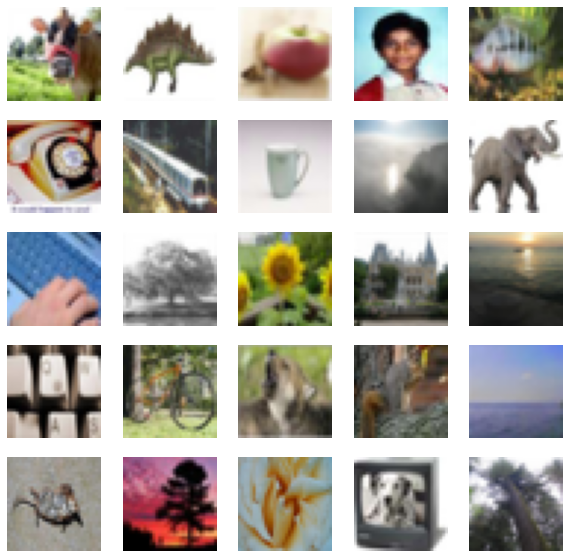

In [5]:
# Doing some plots of the data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')

# Model

In [6]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(100, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
7/7 [==============================] - 3s 349ms/step - loss: 4.6161 - accuracy: 0.0125 - val_loss: 4.6052 - val_accuracy: 0.0200
Epoch 2/10
7/7 [==============================] - 2s 322ms/step - loss: 4.5864 - accuracy: 0.0175 - val_loss: 4.6121 - val_accuracy: 0.0200
Epoch 3/10
7/7 [==============================] - 2s 330ms/step - loss: 4.5744 - accuracy: 0.0162 - val_loss: 4.5967 - val_accuracy: 0.0200
Epoch 4/10
7/7 [==============================] - 2s 318ms/step - loss: 4.5662 - accuracy: 0.0200 - val_loss: 4.6056 - val_accuracy: 0.0250
Epoch 5/10
7/7 [==============================] - 2s 296ms/step - loss: 4.5632 - accuracy: 0.0250 - val_loss: 4.5893 - val_accuracy: 0.0150
Epoch 6/10
7/7 [==============================] - 2s 308ms/step - loss: 4.4974 - accuracy: 0.0262 - val_loss: 4.5764 - val_accuracy: 0.0200
Epoch 7/10
7/7 [==============================] - 2s 320ms/step - loss: 4.4432 - accuracy: 0.0288 - val_loss: 4.6366 - val_accuracy: 0.0350
Epoch 8/10
7/7 [====

# Predictions

In [7]:
# Make predictions and evaluate the model
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
accuracy = np.mean(y_pred_labels == y_test.flatten())
print(f"Accuracy: {accuracy}")


32/32 [==============================] - 1s 22ms/step
Accuracy: 0.033
